In [24]:
import numpy as np
import keras as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras.utils import np_utils
from keras.models import load_model
import matplotlib.pyplot as plt

In [25]:
train_path = 'gen_images/train'
valid_path = 'gen_images/valid'
train_batches = ImageDataGenerator().flow_from_directory(train_path,target_size = (32,32),classes = ['female','male'],batch_size = 10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path,target_size = (32,32),classes = ['female','male'],batch_size = 5)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [26]:
def plots(ims,figsize = (12,6),rows = 1,interp = False , titles = None):
    if(type(ims[0]) is np.ndarray):
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize = figsize)
    cols = len(ims) //rows if len(ims)%2==0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows,cols,i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i],fontsize = 16)
        plt.imshow(ims[i],interpolation = None if interp else 'none')

In [27]:
imgs , labels = next(train_batches)

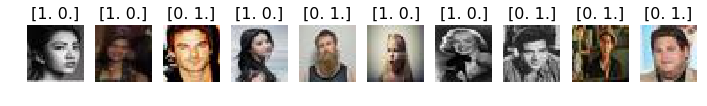

In [28]:
plots(imgs,titles = labels)

# Model Definition

In [29]:
model = Sequential()
model.add(Conv2D(32, (3, 3),
                 input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))


In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_13 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 64)        18496     
__________

In [31]:
model.compile(Adam(lr=0.0001),loss = 'categorical_crossentropy',metrics=['accuracy'])

In [32]:
history = model.fit_generator(train_batches,steps_per_epoch = 100,validation_data = valid_batches,validation_steps = 40,shuffle=True,epochs = 100,verbose = 2)

Epoch 1/100
 - 8s - loss: 7.1223 - acc: 0.5040 - val_loss: 7.8103 - val_acc: 0.5000
Epoch 2/100
 - 7s - loss: 7.0597 - acc: 0.5120 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/100
 - 8s - loss: 7.0567 - acc: 0.5030 - val_loss: 7.9313 - val_acc: 0.5000
Epoch 4/100
 - 7s - loss: 5.6358 - acc: 0.5360 - val_loss: 1.8709 - val_acc: 0.6000
Epoch 5/100
 - 8s - loss: 4.4243 - acc: 0.5330 - val_loss: 1.1784 - val_acc: 0.5950
Epoch 6/100
 - 7s - loss: 2.1197 - acc: 0.5720 - val_loss: 0.6862 - val_acc: 0.6050
Epoch 7/100
 - 8s - loss: 1.0894 - acc: 0.5750 - val_loss: 0.6724 - val_acc: 0.6050
Epoch 8/100
 - 8s - loss: 0.9463 - acc: 0.5720 - val_loss: 0.6444 - val_acc: 0.6250
Epoch 9/100
 - 8s - loss: 0.7964 - acc: 0.6060 - val_loss: 0.6481 - val_acc: 0.5850
Epoch 10/100
 - 7s - loss: 0.7162 - acc: 0.6140 - val_loss: 0.6479 - val_acc: 0.5850
Epoch 11/100
 - 8s - loss: 0.6991 - acc: 0.6250 - val_loss: 0.6330 - val_acc: 0.6300
Epoch 12/100
 - 7s - loss: 0.6269 - acc: 0.6650 - val_loss: 0.6304 - val_a

Epoch 98/100
 - 7s - loss: 0.0465 - acc: 0.9850 - val_loss: 0.7018 - val_acc: 0.7700
Epoch 99/100
 - 7s - loss: 0.0526 - acc: 0.9790 - val_loss: 0.7365 - val_acc: 0.7650
Epoch 100/100
 - 7s - loss: 0.1042 - acc: 0.9590 - val_loss: 0.8029 - val_acc: 0.7800


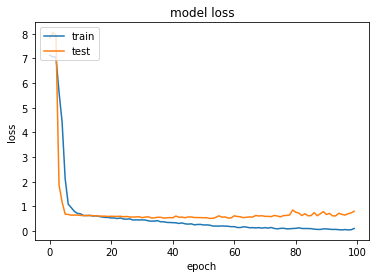

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

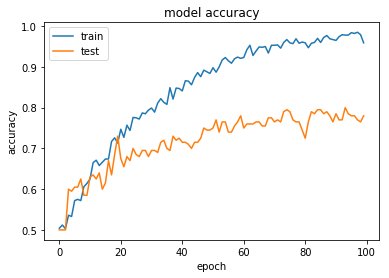

In [34]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()